In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.6 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
# Загрузка данных по акции FDX за выбранные периоды
data_1 = yf.download("FDX", start="2022-03-29", end="2023-03-29")
data_3 = yf.download("FDX", start="2020-03-29", end="2023-03-29")
data_10 = yf.download("FDX", start="2013-03-29", end="2023-03-29")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
# Рассчитываем доходности
returns_1 = data_1['Close'].pct_change()
returns_3 = data_3['Close'].pct_change()
returns_10 = data_10['Close'].pct_change()


returns_1 = returns_1.dropna()
returns_3 = returns_3.dropna()
returns_10 = returns_10.dropna()

In [6]:
# Арифметическая доходности
arithmetic_return1 = np.mean(returns_1)
arithmetic_return3 = np.mean(returns_3)
arithmetic_return10 = np.mean(returns_10)

# Геометрическая доходности
geometric_return1 = np.prod(returns_1 + 1)**(1/len(returns_1)) - 1
geometric_return3 = np.prod(returns_3 + 1)**(1/len(returns_3)) - 1
geometric_return10 = np.prod(returns_10 + 1)**(1/len(returns_10)) - 1

In [7]:
# Выводим результаты
print("Арифметическая доходность:")
print("1 год:", arithmetic_return1)
print("3 года:", arithmetic_return3)
print("10 лет:", arithmetic_return10)

print("Геометрическая доходность:")
print("1 год:", geometric_return1)
print("3 года:", geometric_return3)
print("10 лет:", geometric_return10)

Арифметическая доходность:
1 год: 5.846265689977237e-05
3 года: 0.0010513382469595838
10 лет: 0.0005130542965130329
Геометрическая доходность:
1 год: -0.0003160989858806973
3 года: 0.0007600328881858243
10 лет: 0.0003231466026147878


ADF Statistic: -15.318252
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


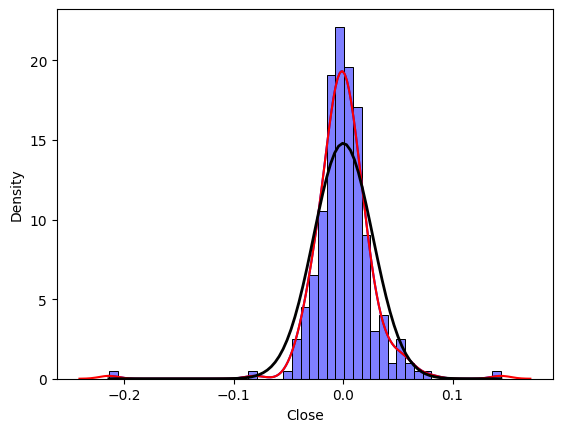

In [8]:
# Построение распределений
sns.histplot(returns_1, kde=True, stat="density", color='blue')
sns.kdeplot(returns_1, color='red')

# Выбираем теоретические распределения
norm_fit = norm.fit(returns_1)
x = np.linspace(returns_1.min(), returns_1.max(), 100)
pdf = norm.pdf(x, *norm_fit)
plt.plot(x, pdf, 'k-', linewidth=2)

# Проверка на стационарность
result = adfuller(returns_1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

In [9]:
data_1 = yf.download("FDX", start="2022-03-29", end="2023-03-29")
data_2 = yf.download("FDX", start="2020-03-29", end="2023-03-29")
data_3 = yf.download("FDX", start="2013-03-29", end="2023-03-29")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
def build_arima_model(data):
    # Разделение данных на обучающую и тестовую выборки
    train_data, test_data = data[:-30], data[-30:]

    # Подбор оптимальных параметров модели ARIMA
    model = auto_arima(train_data, seasonal=False, suppress_warnings=True, error_action='ignore')

    # Прогнозирование значений на тестовой выборке
    forecast = model.predict(n_periods=len(test_data))

    # Визуализация результатов
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(train_data.index, train_data, label='Train')
    ax.plot(test_data.index, test_data, label='Test')
    ax.plot(test_data.index, forecast, label='Forecast')
    ax.legend(loc='upper left', fontsize=8)
    plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


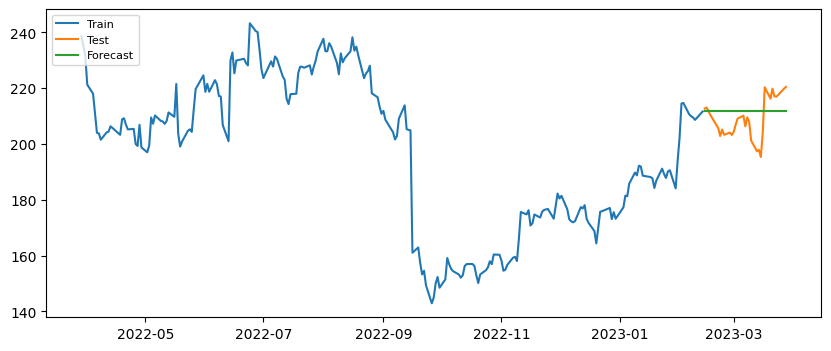

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


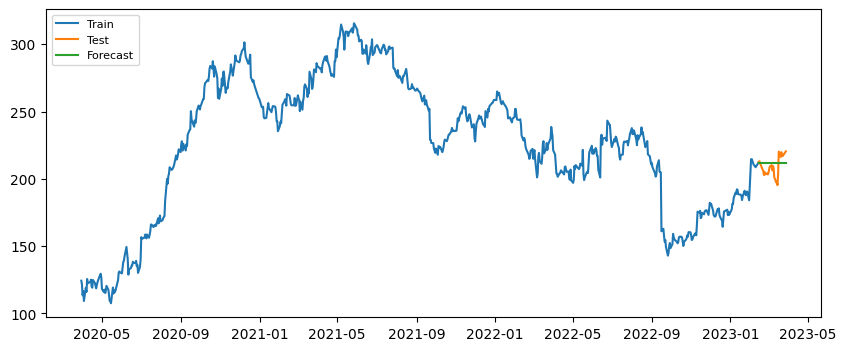

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


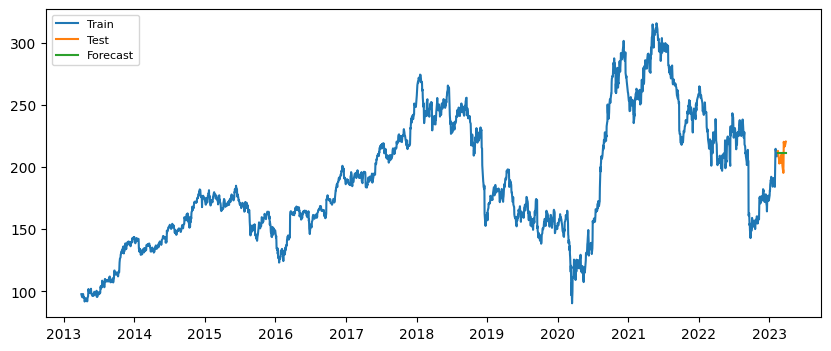

In [11]:
#Построение моделей за определенные периоды времени
build_arima_model(data_1['Close'])
build_arima_model(data_2['Close'])
build_arima_model(data_3['Close'])

In [12]:
# Загружаем данные
data_1y = yf.download("FDX", start="2022-03-29", end="2023-03-29")
data_3y = yf.download("FDX", start="2020-03-29", end="2023-03-29")
data_10y = yf.download("FDX", start="2013-03-29", end="2023-03-29")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
# R-квадрат
def get_r_squared(data):
    X = pd.DataFrame(index=data.index)
    X['days'] = (data.index - data.index.min()).days
    y = data['Adj Close']
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    r2 = r2_score(y, y_pred)
    return r2

In [14]:
# Вычисляем R-квадрат для каждой модели
r2_1y = get_r_squared(data_1y)
r2_3y = get_r_squared(data_3y)
r2_10y = get_r_squared(data_10y)

In [15]:
# Результаты
print(f"R-квадрат для 1 года: {r2_1y}")
print(f"R-квадрат для 3 лет: {r2_3y}")
print(f"R-квадрат для 10 лет: {r2_10y}")

R-квадрат для 1 года: 0.09518321984365852
R-квадрат для 3 лет: 0.0005546941138451222
R-квадрат для 10 лет: 0.4379283084596879


In [16]:
# Выбор лучшей модели
if r2_1y > r2_3y and r2_1y > r2_10y:
    print("1 модель наилучшая(1 год)")
elif r2_3y > r2_1y and r2_3y > r2_10y:
    print("2 модель наилучшая(3 года)")
else:
    print("3 модель наилучшая(10 лет)")

3 модель наилучшая(10 лет)


Значение R-квадрата для выборки большего размера, вероятно, будет выше, чем для выборки меньшего размера из-за повышенной точности данных. Это связано с тем, что больший размер выборки обеспечивает более точные оценки, что может привести к более высоким значениям R в квадрате, что говорит о том, что модель, построенная на данных за 10 лет, лучше подходит для описания изменчивости цен, чем модели, построенные на более коротких периодах времени.

Это может быть связано с тем, что на более длительных периодах времени можно увидеть более длинные циклы и тенденции в изменении цен, что позволяет более точно предсказывать их будущее поведение.

In [17]:
# Загружаем данные
apple_data = yf.download("FDX", start="2013-03-29", end="2023-03-29")

# Создаем сезонную ARIMA модель
model = SARIMAX(apple_data['Adj Close'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

forecast = results.forecast(steps=365)

# Результат
print(forecast.tail())

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2877    238.358216
2878    238.386912
2879    238.513790
2880    238.295221
2881    238.311259
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [18]:
# Загружаем данные
df_real = yf.download("FDX", start="2023-03-30", end="2023-04-04", interval='1d')

[*********************100%***********************]  1 of 1 completed


In [19]:
# Загружаем данные
df = yf.download('FDX', start='2011-01-01', end='2023-03-30')

# Проводим работу с данными
df['NextDayClose'] = df['Close'].shift(-1)
df = df.iloc[:-1]
features = ['Open', 'High', 'Low', 'Volume']
target = 'NextDayClose'

[*********************100%***********************]  1 of 1 completed


In [20]:
# Создаем объект модели и обучаем ее на данных
regressor = LinearRegression()
regressor.fit(df[features], df[target])

LinearRegression()

In [21]:
# создаем новые данные для прогнозирования
new_data = pd.DataFrame({
    'Open': [125.15, 123.35],
    'High': [128.19, 125.89],
    'Low': [124.03, 121.09],
    'Volume': [105350000, 79758000]
})

In [22]:
# даем прогноз на новых данных
prediction = regressor.predict(new_data)

# Результат
print(prediction)

[118.14004189 117.25837346]


In [23]:
# создаем новые данные для прогнозирования
new_data = df[-1:][features]

prediction = regressor.predict(new_data)

# Прогноз и значения за период с 30.03.2023 по 04.04.2023
print("Прогноз:", prediction)
print("Текущая цена:")
print(df_real['Close'])

Прогноз: [222.00313093]
Текущая цена:
Date
2023-03-30    224.399994
2023-03-31    228.490005
2023-04-03    228.839996
Name: Close, dtype: float64
